# Paiva Notebook: FER analysis

In [149]:
# Importing the libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
from PIL import Image
from collections import Counter


# Importing the data about a specific video in the folder "pkl_files"
data = pd.read_pickle("pkl_files/ad-chega.pkl")

"""
# Display the first few rows of the DataFrame to understand its structure
print("\n\n\n***********DATA HEAD*************")
print(data.head())

# Check how many rows and columns are there in the DataFrame
print("\n\n\n***********DATA SHAPE*************")
print(data.shape)

# Get a concise summary of the DataFrame
print("\n\n\n***********DATA INFO*************")
print(data.info())

# Summary statistics for numeric columns
print("\n\n\n***********DATA DESCRIBE*************")
print(data.describe()) """








***********DATA HEAD*************
        filename                                         detections  \
0  img00116.jpeg  [[0, 53, 620, 659, person, 0.93359375], [612, ...   
1  img01657.jpeg  [[87, 45, 740, 587, person, 0.94140625], [1069...   
2  img00589.jpeg  [[625, 31, 646, 686, person, 0.9375], [7, 38, ...   
3  img00264.jpeg  [[604, 101, 111, 133, person, 0.80078125], [15...   
4  img00070.jpeg  [[91, 29, 767, 660, person, 0.9375], [1051, 48...   

                                               poses  \
0  [[[0.6981924772262573, 0.41902482509613037, -0...   
1  [[[0.4402078092098236, 0.4400981664657593, -0....   
2  [[[0.28483036160469055, 0.3542748689651489, -0...   
3  [[[0.7193284034729004, 0.27134227752685547, -0...   
4  [[[0.480089008808136, 0.362809419631958, -0.58...   

                                               faces  \
0  [[[0.6962661743164062, 0.477009117603302, -0.0...   
1  [[[0.4418838918209076, 0.499070942401886, -0.0...   
2  [[[0.6996282339096069, 0.436

## Information about FER (face emotion recognition )

1. Each frame detects up to n faces, where n is the actual number of present faces

2. Each 'face' element has:
    - Location of face: bounding box [x1, x2, y1, y2]
    - Embedding vector of face with 128 elements
    - Emotion: string
    - Logits (probability/accuracy of that same emotion)

3. We can plot individually for this data
    - Most common expressions
    - Most common expressions in pairs

4. Integrating with facial recognition:
    - Most common expressions by person?
    - Who was more upset?





***********FRAME ID*************


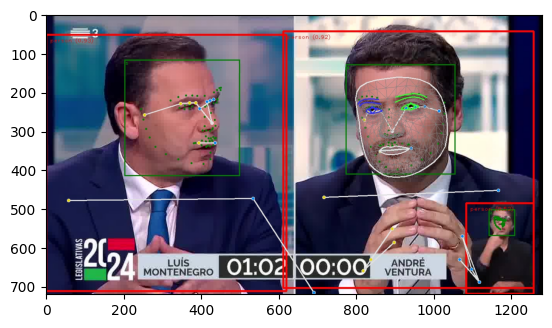




***********FER*************
[{'location': [773, 1055, 129, 412], 'embedding': [-0.04654862359166145, -0.055703867226839066, 0.030526189133524895, -0.1566607505083084, -0.0700339749455452, 0.07200043648481369, -0.11560878902673721, -0.0026026710402220488, -0.007850423455238342, 0.024855848401784897, 0.008624738082289696, -0.0638255774974823, -0.03454547002911568, 0.025359608232975006, 0.08842050284147263, -0.0009314243216067553, 0.04955682530999184, -0.027614520862698555, -0.02903548628091812, 0.026324491947889328, 0.1326320767402649, 0.048952311277389526, 0.03662055358290672, -0.22078949213027954, 0.11258871108293533, -0.07468543201684952, -0.2855584919452667, -0.1660623997449875, -0.028834009543061256, 0.05949556827545166, 0.2061419039964676, -0.028864016756415367, 0.17874041199684143, -0.0791635662317276, -0.0001875050220405683, -0.04046662896871567, -0.09946189820766449, 0.09888261556625366, -0.06955771148204803, 0.0035515050403773785, 0.01599528267979622, -0.13082987070083618, -

In [52]:
# Get information about faces in a random frame
frame_id = data.iloc[0]['filename']
print("\n\n\n***********FRAME ID*************")
print(frame_id)

# Print the frame
#frame = Image.open(frame_id)
#plt.imshow(frame)
#plt.show()

# Get information about fer in that same frame
print("\n\n\n***********FER*************")
fer = data.iloc[0]['fer']
print(fer)




In [150]:
# Order the frames by name
data = data.sort_values(by='filename')





***********EMOTIONS COUNT*************


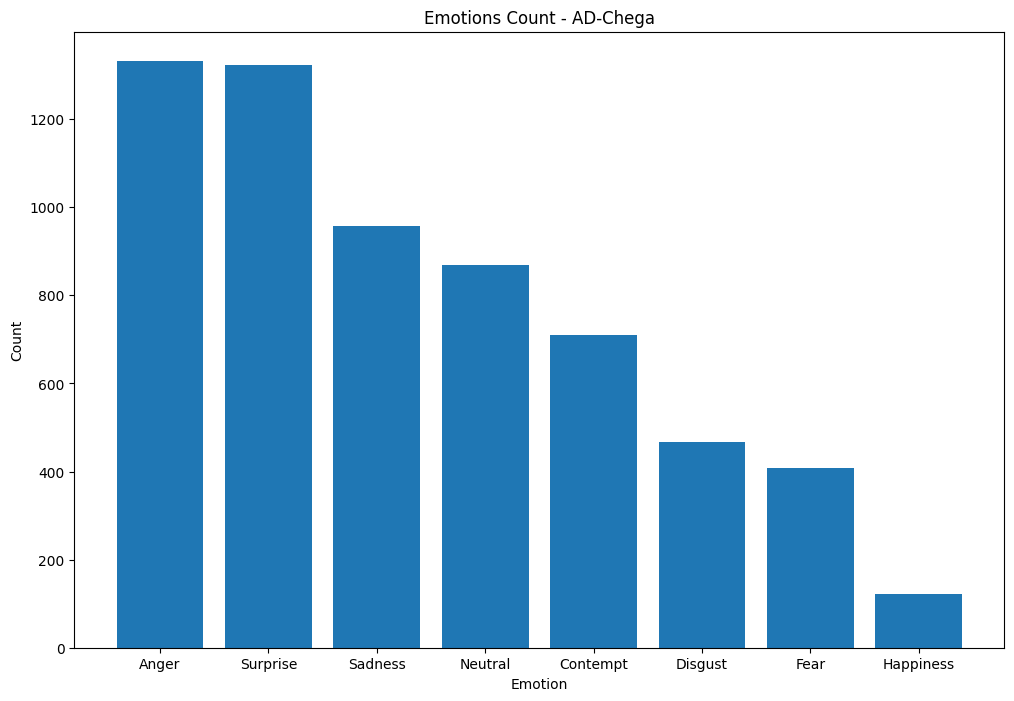

In [151]:
# Count the number of emotions in the DataFrame and plot as a bar chart
print("\n\n\n***********EMOTIONS COUNT*************")
emotions = []

# Loop through the DataFrame and extract the emotions
for i in range(data.shape[0]):
    emotions.extend([fer['emotion'] for fer in data.iloc[i]['fer']])

# Count the number of each emotion
emotion_count = Counter(emotions)

# Order the emotions by their counts
emotion_count = {k: v for k, v in sorted(emotion_count.items(), key=lambda item: item[1], reverse=True)}

# Plot the emotions count
plt.figure(figsize=(12, 8))
plt.bar(emotion_count.keys(), emotion_count.values())
plt.title("Emotions Count - AD-Chega")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()







***********EMOTIONS COUNT NORMALIZED*************
{'Anger': 0.21529012445450138, 'Surprise': 0.213673832228867, 'Sadness': 0.154840795215775, 'Neutral': 0.14029416518506546, 'Contempt': 0.11475674802004203, 'Disgust': 0.07564247615968968, 'Fear': 0.06578309358331987, 'Happiness': 0.019718765152739615}


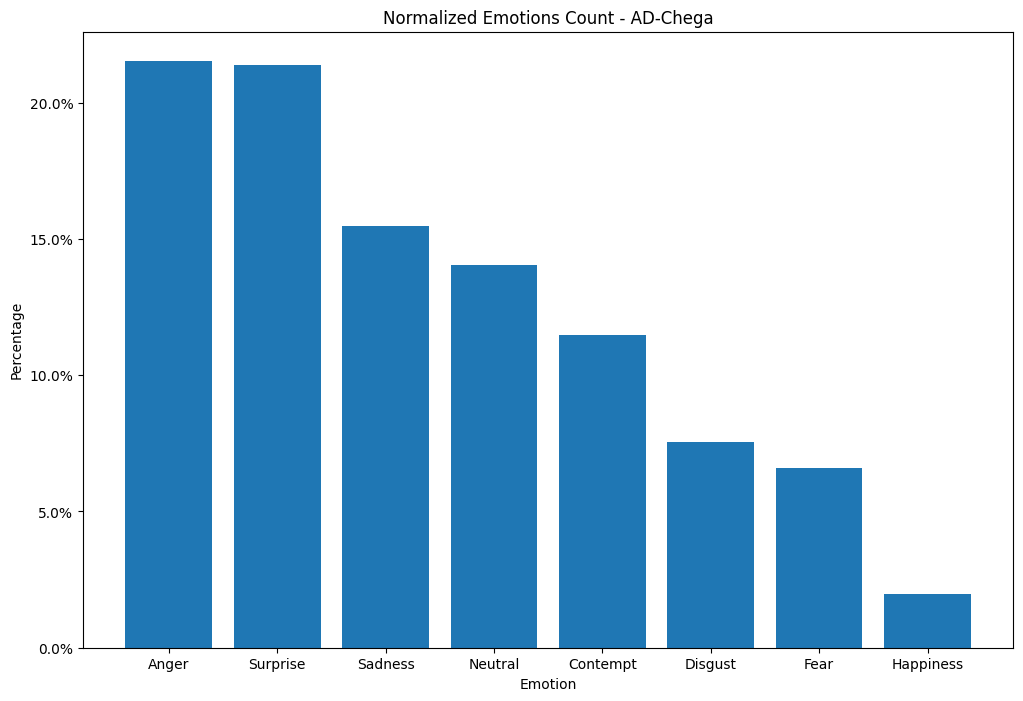

In [152]:

# Normalize the emotions count
total = sum(emotion_count.values())
emotion_count_normalized = {k: v/total for k, v in emotion_count.items()}
print("\n\n\n***********EMOTIONS COUNT NORMALIZED*************")
print(emotion_count_normalized)

# Plot the normalized emotions count
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(emotion_count_normalized.keys(), emotion_count_normalized.values())
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Normalized Emotions Count - AD-Chega")
plt.xlabel("Emotion")
plt.ylabel("Percentage")
plt.show()


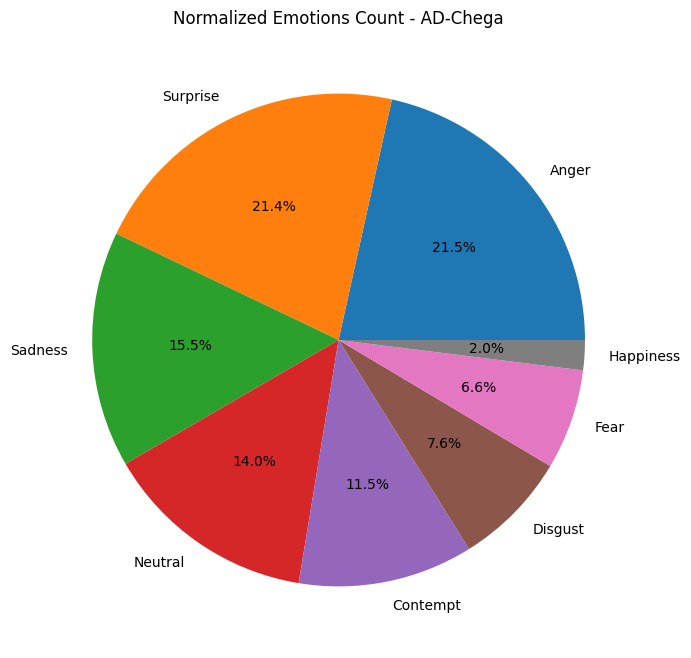

In [153]:
# Plot the normalized emotions count as a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(emotion_count_normalized.values(), labels=emotion_count_normalized.keys(), autopct='%1.1f%%')
plt.title("Normalized Emotions Count - AD-Chega")
plt.show()





***********FACES COUNT NORMALIZED*************


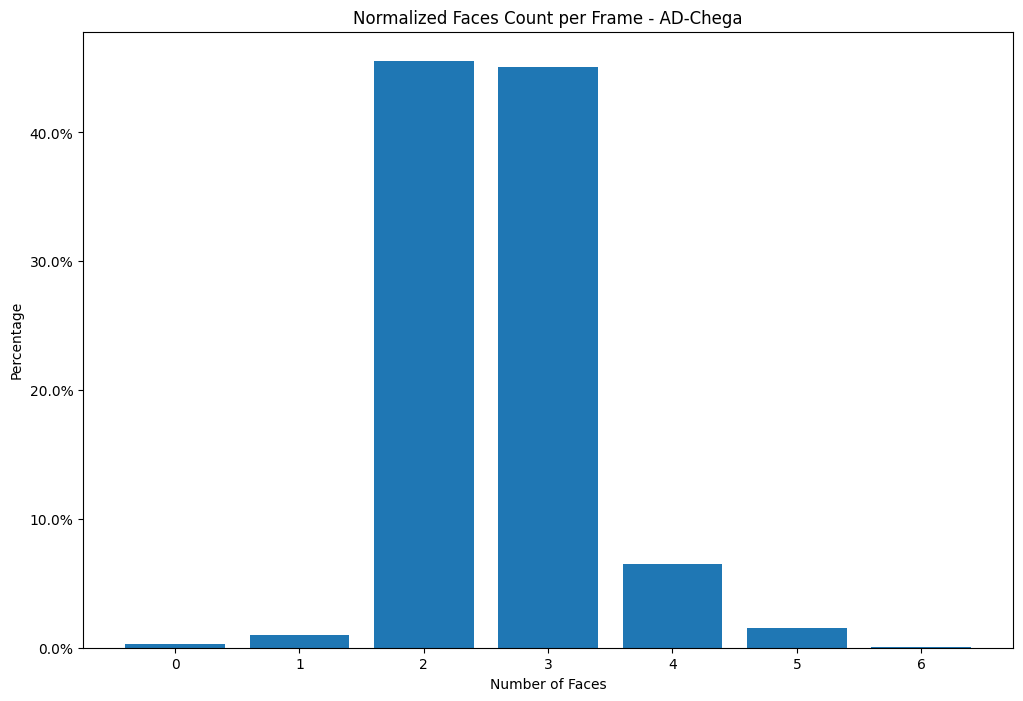

In [154]:
# Check how many faces are in each frame and make a histogram
faces_count = [len(data.iloc[i]['fer']) for i in range(data.shape[0])]
faces_count = Counter(faces_count)
faces_count = {k: v for k, v in sorted(faces_count.items(), key=lambda item: item[0])}

# Normalize the faces count
total = sum(faces_count.values())
faces_count_normalized = {k: v/total for k, v in faces_count.items()}
print("\n\n\n***********FACES COUNT NORMALIZED*************")

# Plot the faces count
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(faces_count_normalized.keys(), faces_count_normalized.values())
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Normalized Faces Count per Frame - AD-Chega")
plt.xlabel("Number of Faces")
plt.ylabel("Percentage")
plt.show()


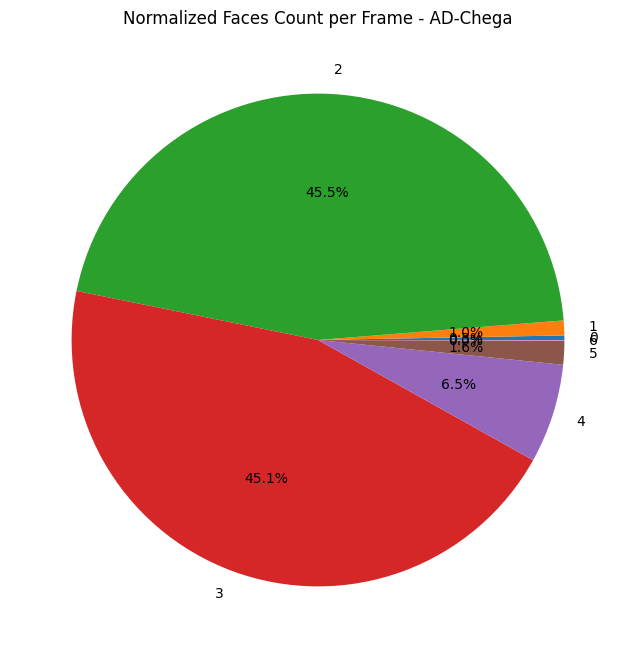

In [155]:
# Plot the faces as a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(faces_count_normalized.values(), labels=faces_count_normalized.keys(), autopct='%1.1f%%')
plt.title("Normalized Faces Count per Frame - AD-Chega")
plt.show()

## Comments on last plot
1. Most of time there is one of the politicians on scene, alongside the translator for deaf people.

2. Having shots of the two politicians side-by-side (plus translator) is also very common.

3. In third place comes the scenario where the TV host also appears.

4. Using image embedding vector can also confirm this

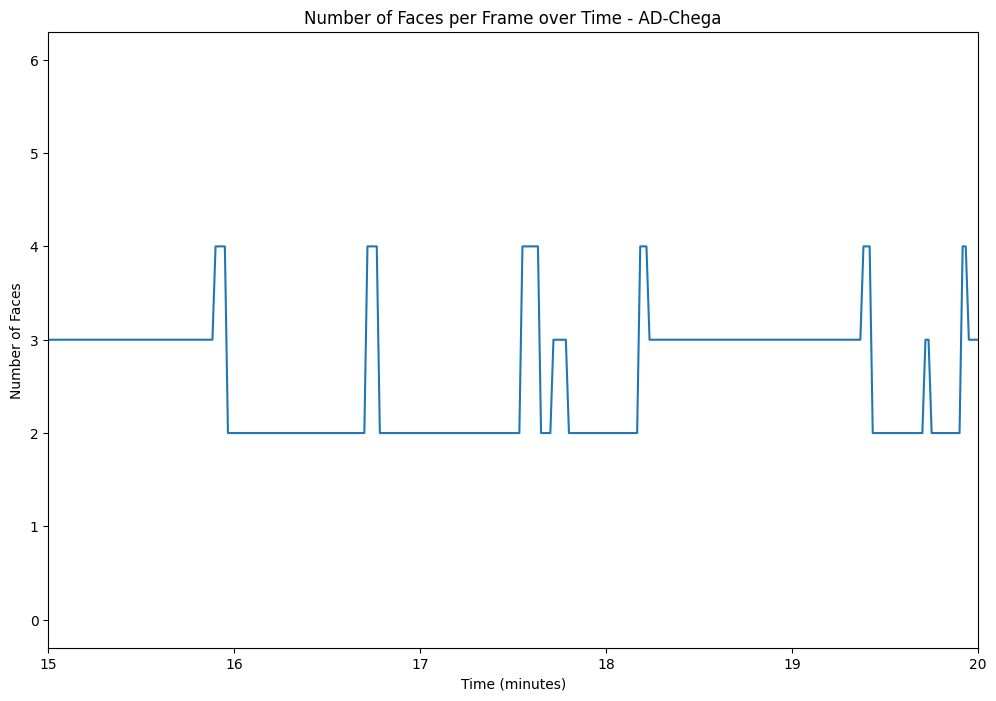

In [156]:
# Number of faces per frame over time (considering frames are already ordered in time and that each frame is 1 second)
# The y-axis represents the number of faces the frame
# The x-axis represents the time in seconds (or frame number)

# Count number of faces in each frame
faces_count = []
for i in range(data.shape[0]):
    faces_count.append(len(data.iloc[i]['fer']))

# Plot the number of faces per frame over time in minutes (each frame is a second)
fig, ax = plt.subplots(figsize=(12, 8))

# Create an array for the x values representing time in minutes
time_in_minutes = np.arange(len(faces_count)) / 60

ax.plot(time_in_minutes, faces_count)
plt.title("Number of Faces per Frame over Time - AD-Chega")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Faces")
plt.xlim(15, 20) # Limit the x-axis to 5 minutes
plt.show()







***********HEATMAP*************


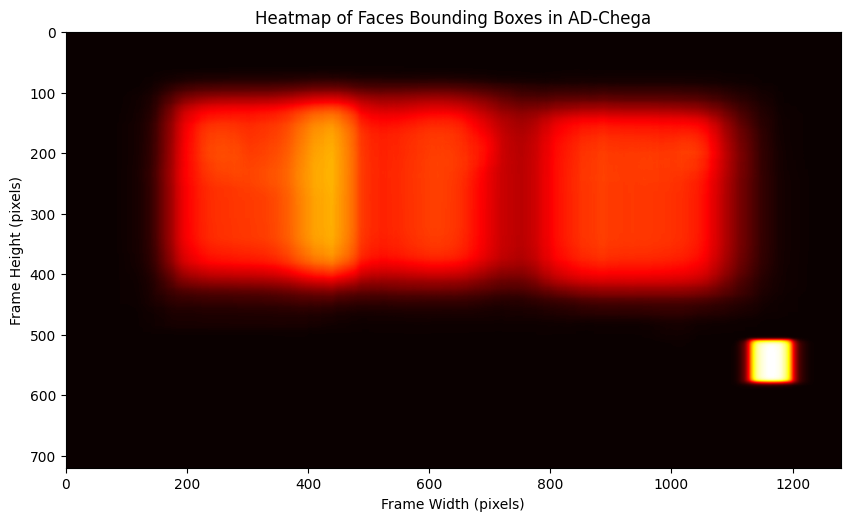

In [163]:
# Plot a heatmap of recognised faces bounding box along the video
# Initialize an empty 2D array for the heatmap

# Load the first frame to get the dimensions
heatmap = np.zeros((720, 1280))

# Loop through the DataFrame and increment the heatmap values at the face positions
print("\n\n\n***********HEATMAP*************")
for i in range(data.shape[0]):
    for fer in data.iloc[i]['fer']:
        face = fer['location']

        x_start = int(fer['location'][0])
        x_end = int(fer['location'][1])
        y_start = int(fer['location'][2])
        y_end = int(fer['location'][3])

        # Increment the heatmap cells corresponding to the bounding box
        heatmap[y_start:y_end, x_start:x_end] += 1


# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap, cmap='hot')  # Overlay the heatmap with transparency
plt.title("Heatmap of Faces Bounding Boxes in AD-Chega")
plt.xlabel("Frame Width (pixels)")
plt.ylabel("Frame Height (pixels)")
plt.show()


